<a href="https://colab.research.google.com/github/priyanu17/gender_identification/blob/master/2_Gender_Data_Acc_95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')


In [92]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [93]:
# creates new directory

import os
#os.mkdir('Images')

In [94]:
# extaract contents of zip file

# import zipfile 
# with zipfile.ZipFile("/content/drive/My Drive/Gender_Classification_renamed.zip", 'r') as zip_ref:
#     zip_ref.extractall("Images")

validation_male (4766).jpg
validation_female (1602).jpg

Display the Male Image


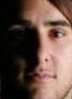


Display the Female Image


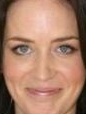

In [137]:
# randomly display contents of a single test class

import os, random 


male_image_path = random.choice(os.listdir("Images/Gender_Classification_renamed/Validation/male") )
female_image_path = random.choice(os.listdir("Images/Gender_Classification_renamed/Validation/female"))

print(male_image_path)
print(female_image_path)

import cv2

from google.colab.patches import cv2_imshow

male_img = cv2.imread("Images/Gender_Classification_renamed/Validation/male/" + male_image_path)
female_img = cv2.imread("Images/Gender_Classification_renamed/Validation/female/" + female_image_path)

print('\nDisplay the Male Image')
cv2_imshow(male_img)

print('\nDisplay the Female Image')
cv2_imshow(female_img)

In [96]:
# Creating our model

In [97]:
# module used to generate custom variations on the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
# variations on the training set images

train_data_gen = ImageDataGenerator(
    rescale=1./255.0, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )


In [99]:
# extract training images from directory

training_set = train_data_gen.flow_from_directory(
                directory = "Images/Gender_Classification_renamed/Training",
                target_size = (64, 64),
                class_mode = 'binary',
                batch_size = 32,
                subset = 'training'
                )

Found 47009 images belonging to 2 classes.


In [100]:
# variations on validation set images : rescaling

valid_data_gen = ImageDataGenerator(
    rescale=1./255.0
    )


In [101]:
# validation set images extracted from directory

validation_set = valid_data_gen.flow_from_directory(
        directory = 'Images/Gender_Classification_renamed/Validation',
        target_size=(64, 64),
        class_mode='binary',
        batch_size=32
)

Found 11649 images belonging to 2 classes.


In [102]:
# imports for the custom model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense

In [120]:

# initiating the model
custom_model = Sequential()

# convolution and pooling operations along with dropout
custom_model.add(Conv2D(32,(5,5),activation='relu',input_shape=(64,64,3)))
custom_model.add(MaxPool2D(2,2))

custom_model.add(Conv2D(64,(5, 5),activation='relu'))
custom_model.add(MaxPool2D(2,2))

custom_model.add(Conv2D(128,(5, 5),activation='relu'))
custom_model.add(MaxPool2D(2,2))

# flattening the output from previous layers
custom_model.add(Flatten())

custom_model.add(Dense(1024,activation='relu'))

# output layer
custom_model.add(Dense(1,activation='sigmoid'))

In [121]:
# compile the model

custom_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [122]:
custom_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 9, 9, 128)         204928    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

In [124]:
# model fit on the training set

history_custom_model = custom_model.fit(training_set,
                            validation_data = validation_set,
                            epochs = 20
                            )

Epoch 1/20
1470/1470 [==============================] - 98s 67ms/step - loss: 0.2112 - accuracy: 0.9196 - val_loss: 0.1524 - val_accuracy: 0.9402
Epoch 2/20
1470/1470 [==============================] - 98s 67ms/step - loss: 0.1641 - accuracy: 0.9393 - val_loss: 0.1410 - val_accuracy: 0.9488
Epoch 3/20
1470/1470 [==============================] - 98s 67ms/step - loss: 0.1535 - accuracy: 0.9445 - val_loss: 0.1411 - val_accuracy: 0.9462
Epoch 4/20
1470/1470 [==============================] - 99s 67ms/step - loss: 0.1457 - accuracy: 0.9476 - val_loss: 0.1127 - val_accuracy: 0.9595
Epoch 5/20
1470/1470 [==============================] - 98s 67ms/step - loss: 0.1417 - accuracy: 0.9488 - val_loss: 0.1493 - val_accuracy: 0.9479
Epoch 6/20
1470/1470 [==============================] - 99s 67ms/step - loss: 0.1345 - accuracy: 0.9522 - val_loss: 0.1138 - val_accuracy: 0.9578
Epoch 7/20
1470/1470 [==============================] - 99s 67ms/step - loss: 0.1297 - accuracy: 0.9540 - val_loss: 0.1095 -

In [125]:
# final evaluation on the validation set

score_custom_model = custom_model.evaluate(validation_set, verbose=2)


365/365 - 7s - loss: 0.1015 - accuracy: 0.9638


In [126]:
# test loss and test accuracy

print('Custom Model : Test Loss is : ', score_custom_model[0])
print('Custom Model : Test Accuracy is : ', score_custom_model[1])

Custom Model : Test Loss is :  0.10151663422584534
Custom Model : Test Accuracy is :  0.9637737274169922


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context = 'paper', style='dark')

In [128]:
def plot_model_loss(model_history):

    # Training vs Validation Loss Visualization :

    history_dict = model_history.history

    # extract train and validation loss values
    loss_values = history_dict['loss']  
    val_loss_values = history_dict['val_loss']
    
    # number of epochs
    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize = (10, 5))

    # plot the validation and train losses
    validation_line = plt.plot(epochs, val_loss_values, label = 'Validation Loss')
    train_line = plt.plot(epochs, loss_values, label = 'Training Loss')

    # set markers 
    plt.setp(validation_line , linewidth = 2.0, marker = '+', markersize = 10.0)
    plt.setp(train_line, linewidth = 2.0, marker = '4', markersize = 10.0)

    # label the images
    plt.xlabel('Epochs :  ')
    plt.ylabel('(Training/Validation)Loss :  ')
    plt.grid(True)
    plt.legend()
    plt.show()

In [129]:
def plot_model_accuracy(model_history):

    # Training vs Validation Accuracy Visualization :

    history_dict = model_history.history

    # extract the train and validation accuracy values
    accuracy_values = history_dict['accuracy']
    val_accuracy_values = history_dict['val_accuracy']

    # number of epochs
    epochs = range(1, len(accuracy_values) + 1)

    plt.figure(figsize = (10, 5))

    # plot the validation and train accuracy
    validation_line = plt.plot(epochs, val_accuracy_values, label = 'Validation Accuracy')
    train_line = plt.plot(epochs, accuracy_values, label = 'Training Accuracy')

    # set markers
    plt.setp(validation_line , linewidth = 2.0, marker = '+', markersize = 10.0)
    plt.setp(train_line, linewidth = 2.0, marker = '4', markersize = 10.0)

    # label the images
    plt.xlabel('Epochs :  ' )
    plt.ylabel('(Training/Validation)Accuracy :  ')
    plt.grid(True)
    plt.legend()
    plt.show()


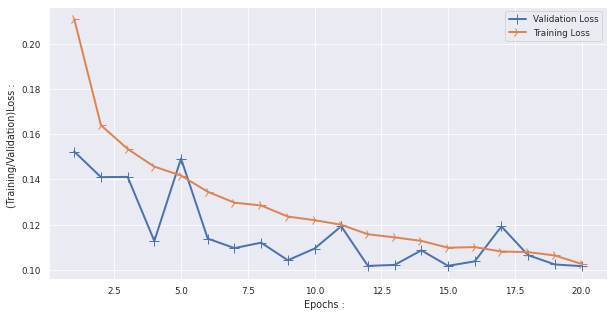

In [130]:
plot_model_loss(history_custom_model)

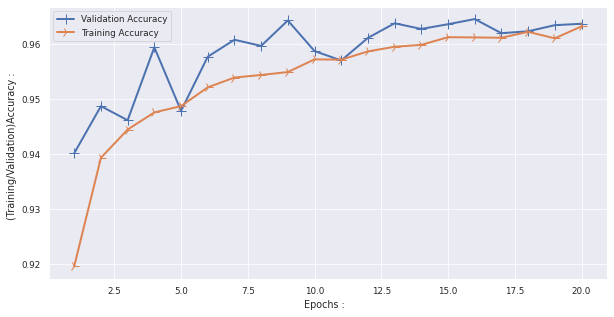

In [131]:
plot_model_accuracy(history_custom_model)

In [132]:
print(set(training_set.classes))


{0, 1}


In [134]:
import numpy as np

In [166]:
def predict_on_single_image(model_to_predict_on, img_height, img_width):
    
    # Predict on a single image from the test directory

    # select test directory
    import os, random 
    selected_folder = random.choice(os.listdir("Images/Gender_Classification_renamed/Validation") )
    selected_folder_picture = random.choice(os.listdir("Images/Gender_Classification_renamed/Validation/" + str(selected_folder)) )


    img = cv2.imread("Images/Gender_Classification_renamed/Validation/" + str(selected_folder) +'/' + str(selected_folder_picture))
    print('\nDisplaying the image\n')
    cv2_imshow(img)

    print('\nActual Class :' , str(selected_folder), '\n')

    from keras.preprocessing import image

    # load the image
    img = image.load_img("Images/Gender_Classification_renamed/Validation/" + str(selected_folder) +'/' + str(selected_folder_picture), 
                        target_size = (img_width, img_height))
    img = image.img_to_array(img) # convert into array 
    img = np.expand_dims(img, axis = 0) # add single image to batch 

    # make prediction
    model_to_predict_on_pred = model_to_predict_on.predict((img))

    category_label = (validation_set.class_indices)
    print('The category labels are : ', str(category_label))
    print('Prediction Output :' , str(model_to_predict_on_pred))

    if (model_to_predict_on_pred.reshape(1)[0] > 0.5):
        print('Predicted Class : male')

    else:
        print('Predicted Class : female')



Displaying the image



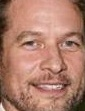


Actual Class : male 

The category labels are :  {'female': 0, 'male': 1}
Prediction Output : [[1.]]
Predicted Class : male


In [167]:
predict_on_single_image(custom_model, 64, 64)